### STEP 3: Basic Model

With this notebook my goal is to build a basic model just to see how a logistic model performs within couple of features.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [55]:
df_1m = pd.read_csv('data_the_babe/df_1m_ready_for_model.csv')

In [5]:
for col in df_1m.columns:
    print(col)   #pass

Unnamed: 0
Unnamed: 0.1
Unnamed: 0.1.1
_id
adOption
daysSinceInstall
hasEnoughCoin
levelMode
levelNumber
numFails
percentageLeft
platform
playTime
playerId
sessions
ts
twentileLeft
target
4
5
6
w0
w10
w20
w30
w40
w50
w60
casual_mode
alternative_mode
event_mode
BoosterUsed
LevelTime
Percentage
AD
AE
AF
AG
AL
AM
AO
AP
AR
AS
AT
AU
AW
AX
AZ
BA
BB
BD
BE
BG
BH
BM
BN
BO
BR
BS
BY
BZ
CA
CD
CH
CI
CL
CN
CO
CR
CW
CY
CZ
DE
DK
DO
DZ
EC
EE
EG
ES
ET
EU
FI
FM
FO
FR
GB
GD
GE
GH
GI
GL
GM
GN
GR
GT
GU
GY
HK
HN
HR
HT
HU
ID
IE
IL
IN
IQ
IR
IS
IT
JE
JM
JO
JP
KE
KG
KH
KN
KR
KW
KZ
LA
LB
LK
LT
LU
LV
LY
MA
MD
ME
MK
ML
MM
MN
MO
MP
MQ
MR
MT
MU
MV
MW
MX
MY
NC
NG
NI
NL
NO
NP
NZ
OM
PA
PE
PF
PG
PH
PK
PL
PR
PS
PT
PY
QA
RE
RO
RS
RU
SA
SC
SD
SE
SG
SI
SK
SN
SV
SY
TH
TJ
TM
TN
TR
TT
TW
TZ
UA
UG
US
UY
UZ
VE
VN
YE
ZA
ZW
Unknown
de
en
es
fr
it
pt-BR
ru
tr
zh-CN


In [5]:
df = df_1m.copy()

My recent goal is to create a basic logistic regression model with only two independent features. Then we will engineer the relavant features one by one in order to built on our MVP.

There are more diligent ways to proceed with nan values instead of simply dropping them, yet for sake of just creating a basic model I am confident to drop only 1% of the data.

In [88]:
print('We proceed with:',9907/10000,'of the data. Haters gona hate...')

We proceed with: 0.9907 of the data. Haters gona hate...


I prefer to include following features to reach target column called 'result' where watching adds or using ingame currency are considered as success(1) whereas rejection is failure(0).
- Hcost
- hasEnoughCoin

Interpretation of the such logistic regression gives us the probability of a player to watch adds or use currency gives that they have enough coin or not with consideration of the cost of progress.

generating features(X1,X2) and target(y);

In [6]:
df_basic = df_1m[['platform','hasEnoughCoin','target','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','_id']].copy()

In [7]:
df_basic.head()

,platform,hasEnoughCoin,target
0,1,1,False
1,1,1,False
2,1,1,False
3,1,1,False
4,1,0,False


Some minor feature engineering:
- HCost --> dummy variables.
- hasEnoughCoin --> status quo as bool
- result --> if 'reject' 0, else 1 --> ***find a better way for improved model***

Following function which gets dummies for given df and columns.

In [91]:
def one_hot_dummy(input_df, columns):
    df_hot = input_df.copy()

    for col in columns:
        dummies = pd.get_dummies(df_hot[col])
#         dummies.drop(dummies.columns[-1], axis=1, inplace=True)  --> not my tempo
        df_hot = df_hot.drop(col, axis=1).merge(dummies, left_index=True, right_index=True)
    
    return df_hot

In [92]:
df_basic = one_hot_dummy(df_basic,['HCost'])

Now we have dummies. Would you like to know why? Check following --> https://www.moresteam.com/whitepapers/download/dummy-variables.pdf

In [93]:
df_basic.head()

,hasEnoughCoin,result,4,5,6
0,1,reject,1,0,0
1,1,reject,1,0,0
2,1,reject,0,0,1
3,1,reject,1,0,0
4,0,reject,0,0,1


In [94]:
df_basic['result'].unique()

array(['reject', 'bought', 'adWatch'], dtype=object)

Following function fixes target.

In [95]:
def fix_target(y):
    if y == 'reject':
        return 0
    else:
        return 1

df_basic['result'] = df_basic['result'].map(fix_target)

In [96]:
df_basic.head()

,hasEnoughCoin,result,4,5,6
0,1,0,1,0,0
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,1,0,0
4,0,0,0,0,1


Looks like the basic_df to create dummy model is ready for train test split.

(1) Assign target and features, (2) split them

In [45]:
y = df_1m['target']
X = df_1m.drop(['target','ts','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','_id'],axis=1)

In [33]:
success_ratio = min(y.value_counts()) / len(y)
failure_ratio = max(y.value_counts()) / len(y)

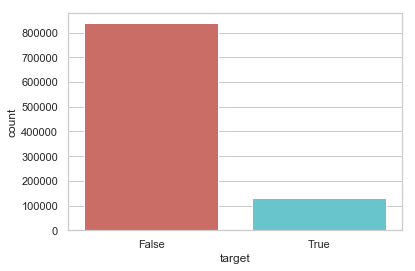

0.13552976799445562


<Figure size 432x288 with 0 Axes>

In [46]:
sns.countplot(x = 'target', data = df_1m , palette = 'hls')
plt.show()
plt.savefig('count_target')
print(success_ratio)

In [24]:
df_basic.groupby('target').mean()

,platform,hasEnoughCoin
target,,
False,0.529961,0.548542
True,0.508332,0.782641


Observations on df_basic:
- Looks like there is a significance behavioral difference when it comes to hasEnoughCoin.
- 13.3 % of the times there was an offer company increased its revenue.
- hasEnoughCoin have some correlation with result whereas the ingame currency cost of progress is insignificant. 

In [48]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=916)

***Model Implementation***

In [14]:
import statsmodels.api as sm
log_model = sm.Logit(y_train, X_train)
result = log_model.fit()
print(result.summary2())

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.501830
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: -0.265     
Dependent Variable: target           AIC:              652034.6784
Date:               2018-11-14 09:30 BIC:              652057.4468
No. Observations:   649653           Log-Likelihood:   -3.2602e+05
Df Model:           1                LL-Null:          -2.5770e+05
Df Residuals:       649651           LLR p-value:      1.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
platform         -1.4432   0.0055 -261.9801 0.0000 -1.4540 -1.4325
hasEnoughCoin    -0.8918   0.0047 -190.2006 0.0000 -0

P-values are all smaller than the significance level 0.05, therefore keep them all. 

In [16]:
y_train.mean()

0.13547693922755685

In [17]:
y_pred = Logreg.predict(X_test.values)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[276578,      0],
       [ 43401,      0]])

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test , y_pred))

             precision    recall  f1-score   support

      False       0.86      1.00      0.93    276578
       True       0.00      0.00      0.00     43401

avg / total       0.75      0.86      0.80    319979



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


80% f1 score which is a weighted average combination of precision and recall sounds good.

***WRONG!*** 

Check the scores for False and True predictions. The model simply predicted that each offer will end up with false result. In other words the model does not predict any True due to unbalanced data. 

And why does the average precision,recall and f1 scores seem to be high although the model is useless at the moment?

In accordance to actual data with the combined target, the success ratio(True) is 13.5%, which means the failure ratio(False) is 86.5%. Consequently when model simply predicts negative for each offer, the predictions are right for 86.5% of the times. Unfortunatelly as mentioned, this does not mean model is usefull.

Now lets create an MVP and try to find ways to lighten symtoms of unbalanced data.

As a reminder we merged adwatch and bought as our target within this model.